# PHASE 1- Vaxshield


## Analysis of VAERS Reports for Vaccine Safety Assessment

### VAERS Data overview

The Vaccine Adverse Event Reporting System (VAERS) is a crucial tool for monitoring vaccine safety in the United States. Key points about VAERS data include:

1. Open Reporting System: VAERS accepts reports from healthcare providers, vaccine manufacturers, and the general public.
2. Broad Scope: The system encourages reporting of any clinically significant health issues following vaccination, even if causality is uncertain.
3. Limitations: VAERS reports alone cannot determine if a vaccine caused an adverse event, as they may include coincidental events
4. Mandatory Reporting: In certain situations, healthcare providers and vaccine manufacturers are required to report to VAERS.

### Data Structure

VAERS data is distributed in three CSV files per year, containing demographic information, vaccine details, and symptom data. The data is from the years 1990 to 2024.

1. VAERSDATA.csv
2. VAERSSYMPTOMS.csv
3. VAERSVAX.csv

### We are working on recent data from the years 2015 to 2025.

## Data Loading

In [85]:
# import the necessary libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings(action='ignore')

In [87]:
# Read the files
path = r"C:\Users\Admin\Downloads\AllVAERSDataCSVS"
files = os.listdir(path)
print(files)

['1990VAERSDATA.csv', '1990VAERSSYMPTOMS.csv', '1990VAERSVAX.csv', '1991VAERSDATA.csv', '1991VAERSSYMPTOMS.csv', '1991VAERSVAX.csv', '1992VAERSDATA.csv', '1992VAERSSYMPTOMS.csv', '1992VAERSVAX.csv', '1993VAERSDATA.csv', '1993VAERSSYMPTOMS.csv', '1993VAERSVAX.csv', '1994VAERSDATA.csv', '1994VAERSSYMPTOMS.csv', '1994VAERSVAX.csv', '1995VAERSDATA.csv', '1995VAERSSYMPTOMS.csv', '1995VAERSVAX.csv', '1996VAERSDATA.csv', '1996VAERSSYMPTOMS.csv', '1996VAERSVAX.csv', '1997VAERSDATA.csv', '1997VAERSSYMPTOMS.csv', '1997VAERSVAX.csv', '1998VAERSDATA.csv', '1998VAERSSYMPTOMS.csv', '1998VAERSVAX.csv', '1999VAERSDATA.csv', '1999VAERSSYMPTOMS.csv', '1999VAERSVAX.csv', '2000VAERSDATA.csv', '2000VAERSSYMPTOMS.csv', '2000VAERSVAX.csv', '2001VAERSDATA.csv', '2001VAERSSYMPTOMS.csv', '2001VAERSVAX.csv', '2002VAERSDATA.csv', '2002VAERSSYMPTOMS.csv', '2002VAERSVAX.csv', '2003VAERSDATA.csv', '2003VAERSSYMPTOMS.csv', '2003VAERSVAX.csv', '2004VAERSDATA.csv', '2004VAERSSYMPTOMS.csv', '2004VAERSVAX.csv', '2005VAER

## Filter files from year 2015 to 2025 and then concatenate the contents of the filtered CSV files into a single DataFrame for each dataset.

In [91]:
# Function to filter CSV files from years 2015-2025
def filter_files(files):
    return [f for f in files if f.split(os.path.sep)[-1][:4].isdigit() and 2015 <= int(f.split(os.path.sep)[-1][:4]) <= 2025]

# Use glob to get all the CSV files for each dataset type (DATA, SYMPTOMS, VAX)
data_files = filter_files(glob.glob(os.path.join(path, '*VAERSDATA.csv')))
symptom_files = filter_files(glob.glob(os.path.join(path, '*VAERSSYMPTOMS.csv')))
vaccine_files = filter_files(glob.glob(os.path.join(path, '*VAERSVAX.csv')))

# Function to read and concatenate multiple the csv files
def read_and_concat(files):
    return pd.concat([pd.read_csv(f, encoding='latin1', low_memory=False) for f in files], ignore_index=True)

In [93]:
# Read and concatenate the data
data_df = read_and_concat(data_files)
symptom_df = read_and_concat(symptom_files)
vaccine_df = read_and_concat(vaccine_files)

## Understanding patient data

In [97]:

data_df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,ORDER
0,509124,01/01/2015,NaN,NaN,NaN,NaN,M,11/21/2014,"Case number PHHY2014US000955, is an initial sp...",NaN,...,Hypertension; Diabetes mellitus,NaN,PHHY2014US000955,1,NaN,NaN,NaN,NaN,NaN,2
1,560330,01/01/2015,UT,1.3,1.0,0.3,M,01/01/2015,"Pinpoint rash on torso, belly, back, neck, chi...",NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1


In [99]:

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498898 entries, 0 to 1498897
Data columns (total 36 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1498898 non-null  int64  
 1   RECVDATE      1498898 non-null  object 
 2   STATE         1237275 non-null  object 
 3   AGE_YRS       1263405 non-null  float64
 4   CAGE_YR       1125043 non-null  float64
 5   CAGE_MO       42572 non-null    float64
 6   SEX           1496585 non-null  object 
 7   RPT_DATE      132580 non-null   object 
 8   SYMPTOM_TEXT  1496817 non-null  object 
 9   DIED          22639 non-null    object 
 10  DATEDIED      19582 non-null    object 
 11  L_THREAT      20727 non-null    object 
 12  ER_VISIT      27855 non-null    object 
 13  HOSPITAL      110555 non-null   object 
 14  HOSPDAYS      65680 non-null    float64
 15  X_STAY        896 non-null      object 
 16  DISABLE       28004 non-null    object 
 17  RECOVD        1334665 non-n

In [101]:

data_df.shape

(1498898, 36)

## Understanding symptoms df

In [105]:

symptom_df.head(2)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,ORDER
0,35842,Cellulitis,18.0,Culture negative,18.0,Ocular hyperaemia,18.0,Pyrexia,18.0,NaN,NaN,2
1,66107,Guillain-Barre syndrome,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [107]:
symptom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954522 entries, 0 to 1954521
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
 11  ORDER            int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 178.9+ MB


In [109]:
symptom_df.shape

(1954522, 12)

## Understanding Vaccine DF

In [113]:

vaccine_df.head(2)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,35842,CHOL,UNKNOWN MANUFACTURER,NaN,UNK,NaN,NaN,CHOLERA (NO BRAND NAME),2
1,35842,TYP,"BERNA BIOTECH, LTD.",115382A,UNK,PO,MO,TYPHOID LIVE ORAL TY21A (VIVOTIF),2


In [115]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712288 entries, 0 to 1712287
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   VAERS_ID         int64 
 1   VAX_TYPE         object
 2   VAX_MANU         object
 3   VAX_LOT          object
 4   VAX_DOSE_SERIES  object
 5   VAX_ROUTE        object
 6   VAX_SITE         object
 7   VAX_NAME         object
 8   ORDER            int64 
dtypes: int64(2), object(7)
memory usage: 117.6+ MB


In [117]:

vaccine_df.shape

(1712288, 9)

## As we are predicting seriousness of the vaccine to the individuals, we want to know which are the top 4 vaccines which effected.

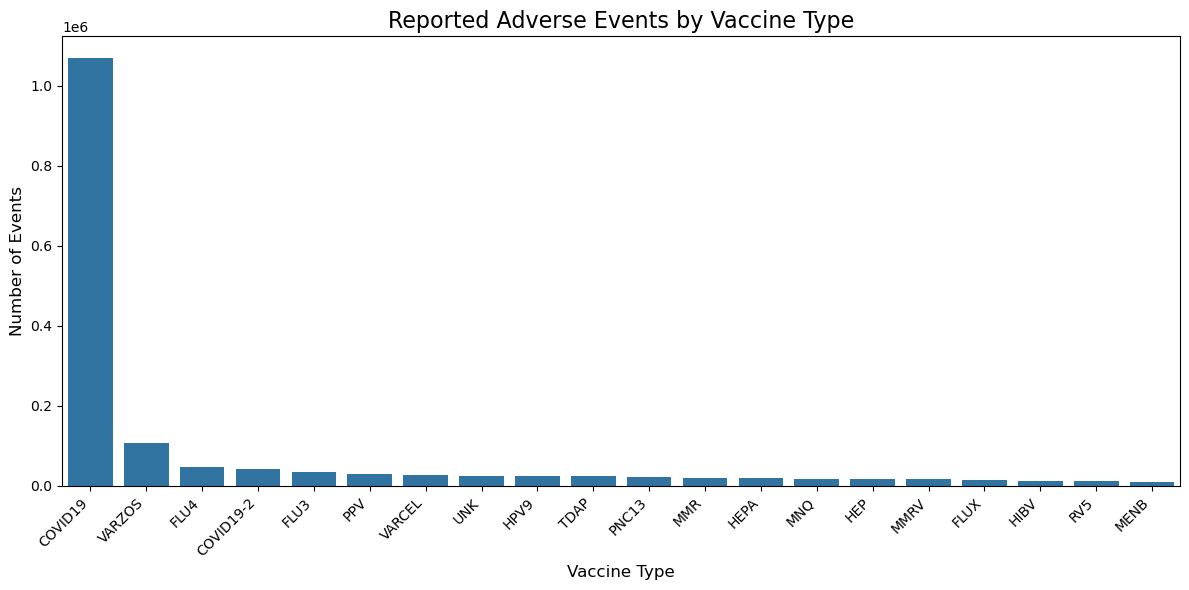

In [121]:
# Top 20 Vaccine Types by Reported Adverse Events
vax_type = vaccine_df['VAX_TYPE'].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=vax_type.index, y=vax_type.values)

plt.title('Reported Adverse Events by Vaccine Type', fontsize=16)
plt.ylabel('Number of Events', fontsize=12)
plt.xlabel('Vaccine Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [123]:
# Get unique vaccine types from the 'VAX_TYPE' column
unique_vaccine_types = vaccine_df['VAX_TYPE'].unique()

# Convert the result to a list for better readability (optional)
unique_vaccine_types_list = unique_vaccine_types.tolist()

# Print the unique vaccine types
print(unique_vaccine_types_list)

['CHOL', 'TYP', 'DTAP', 'MMR', 'OPV', 'JEVX', 'TD', 'FLUX', 'HEPA', 'RAB', 'ANTH', 'HEP', 'FLUN3', 'MEN', 'HIBV', 'PPV', 'VARCEL', 'HEPAB', 'YF', 'TDAP', 'VARZOS', 'HPVX', 'SMALL', 'MNQ', 'HPV4', 'IPV', 'FLU3', 'FLU(H1N1)', 'DTP', 'PNC', 'PNC13', 'FLUX(H1N1)', 'DTAPIPVHIB', 'RV5', 'HPV2', 'DTAPIPV', 'RVX', 'DTAPHEPBIP', 'TTOX', 'FLUN4', 'ADEN_4_7', 'HPV9', 'FLUC3', 'FLU4', 'FLUR3', 'RV1', 'JEV1', 'UNK', 'MENB', 'MMRV', 'DT', 'HBHEPB', 'BCG', 'DTPHEP', 'DTAPH', 'RUB', 'DPP', 'DTPIPV', 'DTIPV', 'FLUN(H1N1)', 'DTPIHI', 'PER', '6VAX-F', 'DTOX', 'MUR', 'MEA', 'MM', 'MNQHIB', 'DTPHIB', 'TDAPIPV', 'MENHIB', 'LYME', 'JEV', 'DTPPHIB', 'FLUC4', 'MER', 'HBPV', 'HEPATYP', 'DPIPV', 'MU', 'PNC10', 'SSEV', 'FLUA3', 'PLAGUE', 'FLUR4', 'CEE', 'ADEN', 'TBE', 'RV', 'FLUA4', 'DF', 'COVID19', 'EBZR', 'DTPPVHBHPB', 'H5N1', 'COVID19-2', 'PNC20', 'PNC15', 'SMALLMNK', 'RSV', 'CHIK', 'MNP', 'PNC21']


From above we can see that various vaccine types fall under the broader category. So we are merging different Covid, and flu vaccine types into single categories labeled as 'COVID', and 'FLU' respectively.

VAX_TYPE
COVID     1112562
VARZOS     106758
FLU        105073
PPV         30473
Name: count, dtype: int64


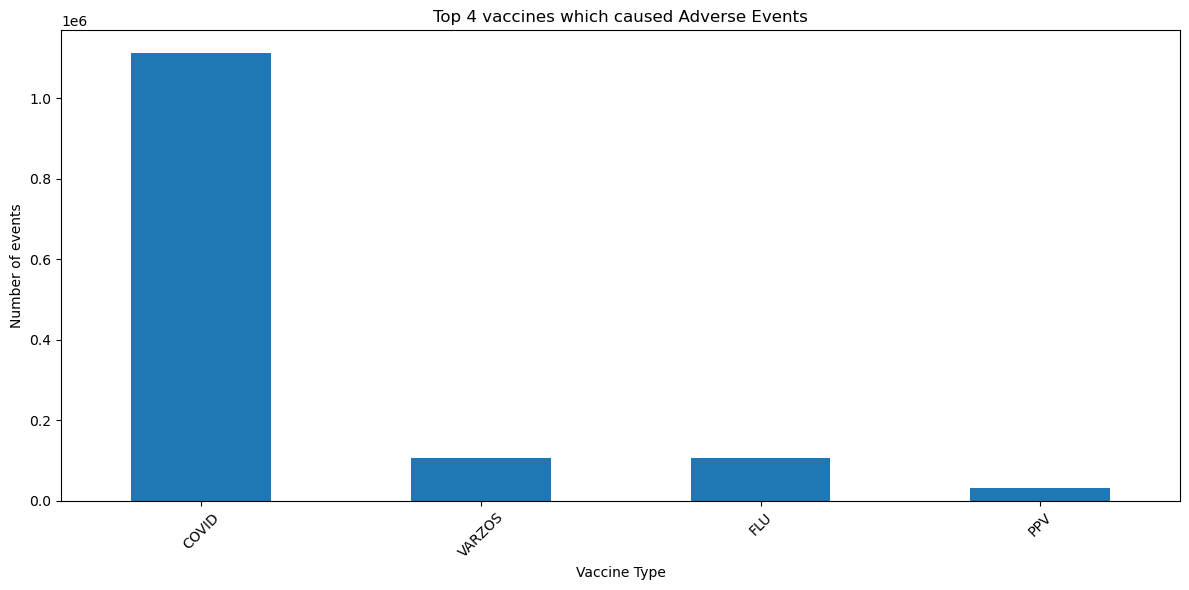

In [127]:
df_copy = vaccine_df.copy()

df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].astype('category')
# Add 'COVID' as a new category to VAX_TYPE 
df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].cat.add_categories(['COVID'])

# Assign 'COVID' to the appropriate rows
df_copy.loc[df_copy['VAX_TYPE'].str.contains('COVID', case=False, na=False), 'VAX_TYPE'] = 'COVID'

# Add 'FLU' as a new category 
df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].cat.add_categories(['FLU'])

# Group flu vaccines
flu_types = ['FLU3', 'FLUN3', 'FLUN(H1N1)', 'FLU(H1N1)', 'FLUA3', 'FLU4',
             'FLUN4', 'FLUC3', 'FLUR3', 'FLUC4', 'FLUR4', 'FLUA4']
df_copy.loc[df_copy['VAX_TYPE'].isin(flu_types), 'VAX_TYPE'] = 'FLU'


# Count the occurrences of each vaccine type
vaccine_counts = df_copy['VAX_TYPE'].value_counts()

# Display the top 4 vaccine types
print(vaccine_counts.head(4))

# Plotting
plt.figure(figsize=(12, 6))
vaccine_counts.head(4).plot(kind='bar')
plt.title('Top 4 vaccines which caused Adverse Events')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

vaccine_df = df_copy

## Define common functions

In [131]:
# Sanity check
def sanity_check(df):
    """
    Performs basic checks for a DataFrame, including unique counts, null counts, and null percentages.
    
    Parameters:
    - df: pandas DataFrame.

    Returns:
    - sanity_report: DataFrame with unique counts, null counts, and null percentages.
    """
    
    return pd.DataFrame({
        'Unique Count': df.nunique(),
        'Null Count': df.isnull().sum(),
        'Null Percentage': (df.isnull().sum() / df.shape[0]) * 100
    })

In [133]:
import numpy as np

def binaryconvert(df, cols):
    """
    Converts categorical values 'Y' and 'N' in specified columns to binary 0's and 1's.
    
    Parameters:
    - df: pandas DataFrame.
    - cols: List of column names to be converted.
    
    Returns:
    - df: pandas DataFrame with specified columns converted to binary.
    """
    for col in cols:
        # Convert 'Y' to 1 and 'N' to 0
        df[col] = np.where(df[col] == "Y", 1, 0)

    return df

In [135]:
import re
import pandas as pd

def regex_clean(text):
    """Cleans the input text using regular expressions."""
    # Remove special terms, digits, and non-English symbols
    text = re.sub(pattern='#x200B;|&lt;|&gt;|&amp;|_', repl=' ', string=str(text))
    text = re.sub(pattern=r'\d+', repl=' ', string=text)
    text = re.sub(pattern=r'[^a-zA-Z1-9]+', repl=' ', string=text)
    
    return text

## Merging all dateframes

In [138]:
vaers = data_df.merge(vaccine_df, on='VAERS_ID',how='right').merge(symptom_df, on='VAERS_ID',how='inner')
print(vaers["VAERS_ID"].nunique())

1459610


In [139]:
vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763537 entries, 0 to 2763536
Data columns (total 55 columns):
 #   Column           Dtype   
---  ------           -----   
 0   VAERS_ID         int64   
 1   RECVDATE         object  
 2   STATE            object  
 3   AGE_YRS          float64 
 4   CAGE_YR          float64 
 5   CAGE_MO          float64 
 6   SEX              object  
 7   RPT_DATE         object  
 8   SYMPTOM_TEXT     object  
 9   DIED             object  
 10  DATEDIED         object  
 11  L_THREAT         object  
 12  ER_VISIT         object  
 13  HOSPITAL         object  
 14  HOSPDAYS         float64 
 15  X_STAY           object  
 16  DISABLE          object  
 17  RECOVD           object  
 18  VAX_DATE         object  
 19  ONSET_DATE       object  
 20  NUMDAYS          float64 
 21  LAB_DATA         object  
 22  V_ADMINBY        object  
 23  V_FUNDBY         object  
 24  OTHER_MEDS       object  
 25  CUR_ILL          object  
 26  HISTORY       

In [140]:

vaers.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,ORDER
0,35842,05/15/2015,NaN,NaN,NaN,NaN,M,05/15/2015,This case was found during archiving activitie...,NaN,...,18.0,Culture negative,18.0,Ocular hyperaemia,18.0,Pyrexia,18.0,NaN,NaN,2
1,35842,05/15/2015,NaN,NaN,NaN,NaN,M,05/15/2015,This case was found during archiving activitie...,NaN,...,18.0,Culture negative,18.0,Ocular hyperaemia,18.0,Pyrexia,18.0,NaN,NaN,2


In [141]:

vaers.shape

(2763537, 55)

In [142]:
sanity_check(vaers)

,Unique Count,Null Count,Null Percentage
VAERS_ID,1459610,0,0.000000
RECVDATE,3894,0,0.000000
STATE,116,403945,14.616956
AGE_YRS,359,342457,12.391982
CAGE_YR,120,656708,23.763315
CAGE_MO,11,2645963,95.745525
SEX,3,3265,0.118146
RPT_DATE,3081,2419777,87.560869
SYMPTOM_TEXT,1378242,2767,0.100125
DIED,1,2691675,97.399637


## Data Cleaning

In [144]:
vaers.duplicated().value_counts()

False    2757626
True        5911
Name: count, dtype: int64

In [145]:
# drop duplicates
vaers.drop_duplicates(inplace=True)
vaers.duplicated().value_counts()

False    2757626
Name: count, dtype: int64

A new version of the VAERS form, VAERS 2, was released in July 2017. Some fields in the VAERS 1 form were modified and others discontinued.

In [147]:
# we are using Vaers version 2
# check versions
print(vaers['FORM_VERS'].value_counts())

# drop version 1
vaers.drop(vaers[vaers['FORM_VERS'] != 2].index, inplace=True)

FORM_VERS
2    2408436
1     349190
Name: count, dtype: int64


In [148]:
null_counts = vaers.isnull().sum()
null_counts

VAERS_ID                 0
RECVDATE                 0
STATE               309091
AGE_YRS             273644
CAGE_YR             515701
CAGE_MO            2327783
SEX                   3232
RPT_DATE           2408435
SYMPTOM_TEXT          2691
DIED               2340140
DATEDIED           2345827
L_THREAT           2327382
ER_VISIT           2408436
HOSPITAL           2039212
HOSPDAYS           2157054
X_STAY             2406101
DISABLE            2310374
RECOVD              240511
VAX_DATE            189626
ONSET_DATE          235656
NUMDAYS             339154
LAB_DATA           1427602
V_ADMINBY                0
V_FUNDBY           2408436
OTHER_MEDS         1187371
CUR_ILL            1664078
HISTORY            1160445
PRIOR_VAX          2288727
SPLTTYPE           1648647
FORM_VERS                0
TODAYS_DATE          27040
BIRTH_DEFECT       2406316
OFC_VISIT          1786526
ER_ED_VISIT        1960096
ALLERGIES          1400991
ORDER_x                  0
VAX_TYPE                 0
V

As we see there are many null values in a few columns, we are dropping them to remove irregularities.

In [150]:
# Updated list based on your actual columns
columns_to_drop = [
    'RPT_DATE', 'ER_VISIT', 'V_FUNDBY', 'RECVDATE',
    'CAGE_YR', 'CAGE_MO', 'FORM_VERS', 'LAB_DATA',
    'TODAYS_DATE', 'DATEDIED', 'SPLTTYPE', 'PRIOR_VAX',
    'OFC_VISIT', 'X_STAY', 'ER_ED_VISIT',
    'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3',
    'SYMPTOMVERSION4', 'SYMPTOMVERSION5'
    
]

# Drop columns safely (ignores if any are missing)
vaers.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Optional: verify
print("Remaining columns:", vaers.columns.tolist())


Remaining columns: ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'BIRTH_DEFECT', 'ALLERGIES', 'ORDER_x', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'ORDER_y', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'ORDER']


In [151]:
# drop null in age and symtom text
vaers = vaers.dropna(subset = ['AGE_YRS'])
vaers = vaers.dropna(subset = ['SYMPTOM_TEXT'])
vaers = vaers.dropna(subset = ['STATE'])

In [152]:
# List of date columns to convert
date_columns = ['VAX_DATE', 'ONSET_DATE']

# Converting the date columns to datetime format
vaers[date_columns] = vaers[date_columns].apply(pd.to_datetime)

In [153]:
# Remove rows with null values in VAX_DATE and ONSET_DATE, and keep relevant data
vaers = vaers.dropna(subset=['VAX_DATE', 'ONSET_DATE'])

# Calculate 'NUMDAYS' as the difference between ONSET_DATE and VAX_DATE
vaers['NUMDAYS'] = (vaers['ONSET_DATE'] - vaers['VAX_DATE']).dt.days

# Interval between vaccination date and onset date should be positive, otherwise AE occured prior to vaccination
vaers = vaers[vaers['NUMDAYS'] >= 0]

# Ensure NUMDAYS is of integer type
vaers['NUMDAYS'] = vaers['NUMDAYS'].astype(int)

In [154]:
# Converting SEX column to binary
vaers['SEX'] = vaers['SEX'].replace({'U': '2', 'F': '0', 'M': '1'})

# Cleaning RECOVD column
vaers['RECOVD'] = vaers['RECOVD'].fillna(2).replace({'U': 2, 'N': 0, 'Y': 1})

# Cleaning HOSPDAYS column
vaers['HOSPDAYS'] = vaers['HOSPDAYS'].fillna(0)

# Converting STATE to uppercase
vaers['STATE'] = vaers['STATE'].str.upper()

In [155]:
# Converting SEX column to binary
vaers['SEX'] = vaers['SEX'].replace({'U': 2, 'F': 0, 'M': 1})

# Cleaning RECOVD column
vaers['RECOVD'] = vaers['RECOVD'].fillna('U').replace({'U': 2, 'N': 0, 'Y': 1})

# Cleaning HOSPDAYS column
vaers['HOSPDAYS'] = vaers['HOSPDAYS'].fillna(0)

# Converting STATE to uppercase
vaers['STATE'] = vaers['STATE'].str.upper()

# Show table output
vaers.head()


,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER_y,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ORDER
5199,547879,WI,11.0,0,sensitivy to light; trouble hearing; short ter...,NaN,NaN,NaN,0.0,Y,...,SYR,AR,HPV (GARDASIL),2,Abdominal pain,Blood pressure decreased,Chronic fatigue syndrome,Dizziness,Heart rate increased,2
5200,547879,WI,11.0,0,sensitivy to light; trouble hearing; short ter...,NaN,NaN,NaN,0.0,Y,...,SYR,AR,HPV (GARDASIL),2,Insomnia,Migraine,Nausea,Postural orthostatic tachycardia syndrome,Serum ferritin decreased,2
5201,547879,WI,11.0,0,sensitivy to light; trouble hearing; short ter...,NaN,NaN,NaN,0.0,Y,...,SYR,AR,HPV (GARDASIL),2,Syncope,Tilt table test positive,Vitamin D decreased,Vitamin D deficiency,NaN,2
5202,547879,WI,11.0,0,sensitivy to light; trouble hearing; short ter...,NaN,NaN,NaN,0.0,Y,...,SYR,AR,HPV (GARDASIL),2,Abdominal discomfort,Abdominal pain,Agitation,Amnesia,Antibody test positive,3
5203,547879,WI,11.0,0,sensitivy to light; trouble hearing; short ter...,NaN,NaN,NaN,0.0,Y,...,SYR,AR,HPV (GARDASIL),2,Arthralgia,Asthenia,Autoimmune neuropathy,Autonomic neuropathy,Back pain,3


In [156]:
# Convert all string values in the DataFrame to uppercase
vaers = vaers.applymap(lambda x: x.upper() if isinstance(x, str) else x)
vaers.head(2)

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER_y,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ORDER
5199,547879,WI,11.0,0,SENSITIVY TO LIGHT; TROUBLE HEARING; SHORT TER...,NaN,NaN,NaN,0.0,Y,...,SYR,AR,HPV (GARDASIL),2,ABDOMINAL PAIN,BLOOD PRESSURE DECREASED,CHRONIC FATIGUE SYNDROME,DIZZINESS,HEART RATE INCREASED,2
5200,547879,WI,11.0,0,SENSITIVY TO LIGHT; TROUBLE HEARING; SHORT TER...,NaN,NaN,NaN,0.0,Y,...,SYR,AR,HPV (GARDASIL),2,INSOMNIA,MIGRAINE,NAUSEA,POSTURAL ORTHOSTATIC TACHYCARDIA SYNDROME,SERUM FERRITIN DECREASED,2


In [157]:
# Columns to clean
cols_to_clean = ['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES', 'CUR_ILL']

# Apply the regex_clean function to each specified column
for col in cols_to_clean:
    vaers[col] = vaers[col].apply(regex_clean)

In [158]:
# Replace in OTHER_MEDS
vaers['OTHER_MEDS'] = vaers['OTHER_MEDS'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in CUR_ILL
vaers['CUR_ILL'] = vaers['CUR_ILL'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in HISTORY
vaers['HISTORY'] = vaers['HISTORY'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in ALLERGIES
vaers['ALLERGIES'] = vaers['ALLERGIES'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

In [159]:
symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for column in symptom_columns:
    vaers[column] = vaers[column].replace([np.nan, 'NAN'], ' ', regex=True)

In [160]:
# Define the irrelevant symptoms to check
irrelevant_symptoms = [
    'PRODUCT ADMINISTERED TO PATIENT OF INAPPROPRIATE AGE'
    'NO ADVERSE EVENT',
    'INAPPROPRIATE SCHEDULE OF PRODUCT ADMINISTRATION',
    'SARS-COV-2 TEST',
    'BACTERIAL TEST NEGATIVE',
    'WRONG DRUG ADMINISTERED',
    'UNEVALUABLE EVENT',
    'PRODUCT STORAGE ERROR',
    'SARS-COV-2 TEST POSITIVE',
    'EXPIRED PRODUCT ADMINISTERED'
]

# Check if any of the irrelevant symptoms are present in the specified columns
mask = vaers[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].isin(irrelevant_symptoms)

# Check if there are any irrelevant symptoms in the DataFrame
if mask.any().any():
    print("Irrelevant symptoms found in the DataFrame.")
else:
    print("No irrelevant symptoms found in the DataFrame.")

Irrelevant symptoms found in the DataFrame.


In [161]:
# Dropping irrelevant symptoms 
mask = ~(
    (vaers[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].isin(irrelevant_symptoms)).any(axis=1)
)

# Filter the DataFrame
vaers = vaers[mask]
vaers.reset_index(drop=True, inplace=True)

In [162]:
# Convert specified columns in the DataFrame to binary values.
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT']
binaryconvert(vaers,cols)

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER_y,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ORDER
0,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,ABDOMINAL PAIN,BLOOD PRESSURE DECREASED,CHRONIC FATIGUE SYNDROME,DIZZINESS,HEART RATE INCREASED,2
1,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,INSOMNIA,MIGRAINE,NAUSEA,POSTURAL ORTHOSTATIC TACHYCARDIA SYNDROME,SERUM FERRITIN DECREASED,2
2,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,SYNCOPE,TILT TABLE TEST POSITIVE,VITAMIN D DECREASED,VITAMIN D DEFICIENCY,,2
3,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,ABDOMINAL DISCOMFORT,ABDOMINAL PAIN,AGITATION,AMNESIA,ANTIBODY TEST POSITIVE,3
4,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,ARTHRALGIA,ASTHENIA,AUTOIMMUNE NEUROPATHY,AUTONOMIC NEUROPATHY,BACK PAIN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588390,2855970,FL,66.0,0,I GOT THE INJECTION AROUND NOON AND I CAME HOM...,0,0,0,0.0,0,...,SYR,LA,INFLUENZA (SEASONAL) (FLUBLOK),1,DIZZINESS,FATIGUE,FEELING COLD,MUSCULAR WEAKNESS,PYREXIA,1
1588391,2855970,FL,66.0,0,I GOT THE INJECTION AROUND NOON AND I CAME HOM...,0,0,0,0.0,0,...,SYR,LA,INFLUENZA (SEASONAL) (FLUBLOK),1,VOMITING,,,,,1
1588392,2855990,TX,32.0,1,ARM WRIST LEG SWELLING THAT COMES AND GOES AND...,0,0,0,0.0,1,...,IM,UN,COVID19 (COVID19 (PFIZER-BIONTECH)),1,ANTINUCLEAR ANTIBODY NEGATIVE,BIOPSY PERIPHERAL NERVE,BLOOD PRESSURE FLUCTUATION,BORRELIA TEST NEGATIVE,BRAIN FOG,1
1588393,2855990,TX,32.0,1,ARM WRIST LEG SWELLING THAT COMES AND GOES AND...,0,0,0,0.0,1,...,IM,UN,COVID19 (COVID19 (PFIZER-BIONTECH)),1,CHEST X-RAY NORMAL,COMPUTERISED TOMOGRAM HEAD NORMAL,FATIGUE,HYPERACUSIS,JOINT SWELLING,1


In [163]:
vaers.reset_index(drop=True, inplace=True)
vaers.head()


,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER_y,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ORDER
0,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,ABDOMINAL PAIN,BLOOD PRESSURE DECREASED,CHRONIC FATIGUE SYNDROME,DIZZINESS,HEART RATE INCREASED,2
1,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,INSOMNIA,MIGRAINE,NAUSEA,POSTURAL ORTHOSTATIC TACHYCARDIA SYNDROME,SERUM FERRITIN DECREASED,2
2,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,SYNCOPE,TILT TABLE TEST POSITIVE,VITAMIN D DECREASED,VITAMIN D DEFICIENCY,,2
3,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,ABDOMINAL DISCOMFORT,ABDOMINAL PAIN,AGITATION,AMNESIA,ANTIBODY TEST POSITIVE,3
4,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,ARTHRALGIA,ASTHENIA,AUTOIMMUNE NEUROPATHY,AUTONOMIC NEUROPATHY,BACK PAIN,3


In [164]:

vaers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588395 entries, 0 to 1588394
Data columns (total 35 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   VAERS_ID         1588395 non-null  int64         
 1   STATE            1588395 non-null  object        
 2   AGE_YRS          1588395 non-null  float64       
 3   SEX              1588310 non-null  object        
 4   SYMPTOM_TEXT     1588395 non-null  object        
 5   DIED             1588395 non-null  int32         
 6   L_THREAT         1588395 non-null  int32         
 7   HOSPITAL         1588395 non-null  int32         
 8   HOSPDAYS         1588395 non-null  float64       
 9   DISABLE          1588395 non-null  int32         
 10  RECOVD           1588395 non-null  int64         
 11  VAX_DATE         1588395 non-null  datetime64[ns]
 12  ONSET_DATE       1588395 non-null  datetime64[ns]
 13  NUMDAYS          1588395 non-null  int64         
 14  V_

In [165]:
sanity_check(vaers)

,Unique Count,Null Count,Null Percentage
VAERS_ID,822504,0,0.000000
STATE,64,0,0.000000
AGE_YRS,162,0,0.000000
SEX,3,85,0.005351
SYMPTOM_TEXT,804530,0,0.000000
DIED,2,0,0.000000
L_THREAT,2,0,0.000000
HOSPITAL,2,0,0.000000
HOSPDAYS,154,0,0.000000
DISABLE,2,0,0.000000


In [166]:

vaers.head(2)

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER_y,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ORDER
0,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,ABDOMINAL PAIN,BLOOD PRESSURE DECREASED,CHRONIC FATIGUE SYNDROME,DIZZINESS,HEART RATE INCREASED,2
1,547879,WI,11.0,0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,SYR,AR,HPV (GARDASIL),2,INSOMNIA,MIGRAINE,NAUSEA,POSTURAL ORTHOSTATIC TACHYCARDIA SYNDROME,SERUM FERRITIN DECREASED,2


In [167]:
vaers.to_csv(r'C:\Users\Admin\Downloads\capstone\cleaned_vaers.csv', index=False)


In [168]:

vaers.shape

(1588395, 35)

# Load Data for EDA

In [170]:
import pandas as pd
vaers_df = pd.read_csv(r'C:\Users\Admin\Downloads\capstone\cleaned_vaers.csv')

In [171]:

vaers_df = vaers_df.dropna(subset = ['SYMPTOM_TEXT'])
sanity_check(vaers_df)

,Unique Count,Null Count,Null Percentage
VAERS_ID,822492,0,0.000000
STATE,64,0,0.000000
AGE_YRS,162,0,0.000000
SEX,3,85,0.005351
SYMPTOM_TEXT,804529,0,0.000000
DIED,2,0,0.000000
L_THREAT,2,0,0.000000
HOSPITAL,2,0,0.000000
HOSPDAYS,154,0,0.000000
DISABLE,2,0,0.000000


In [172]:
# Replace in OTHER_MEDS
vaers_df['OTHER_MEDS'] = vaers_df['OTHER_MEDS'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in CUR_ILL
vaers_df['CUR_ILL'] = vaers_df['CUR_ILL'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in HISTORY
vaers_df['HISTORY'] = vaers_df['HISTORY'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in ALLERGIES
vaers_df['ALLERGIES'] = vaers_df['ALLERGIES'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for column in symptom_columns:
    vaers_df[column] = vaers_df[column].replace([np.nan, 'NAN'], ' ', regex=True)

In [173]:

sanity_check(vaers_df)

,Unique Count,Null Count,Null Percentage
VAERS_ID,822492,0,0.000000
STATE,64,0,0.000000
AGE_YRS,162,0,0.000000
SEX,3,85,0.005351
SYMPTOM_TEXT,804529,0,0.000000
DIED,2,0,0.000000
L_THREAT,2,0,0.000000
HOSPITAL,2,0,0.000000
HOSPDAYS,154,0,0.000000
DISABLE,2,0,0.000000


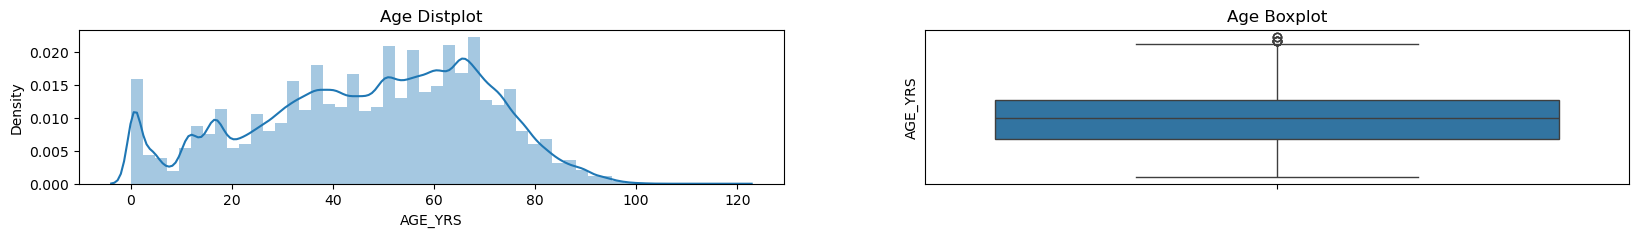

In [174]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(vaers_df['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(vaers_df['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [175]:
# Filter the dataframe for ages between 5 and 90 years
vaers_df = vaers_df[(vaers_df['AGE_YRS'] >= 5) & (vaers_df['AGE_YRS'] <= 90)]

<Axes: title={'center': 'vaccine route of administration'}, xlabel='VAX_ROUTE'>

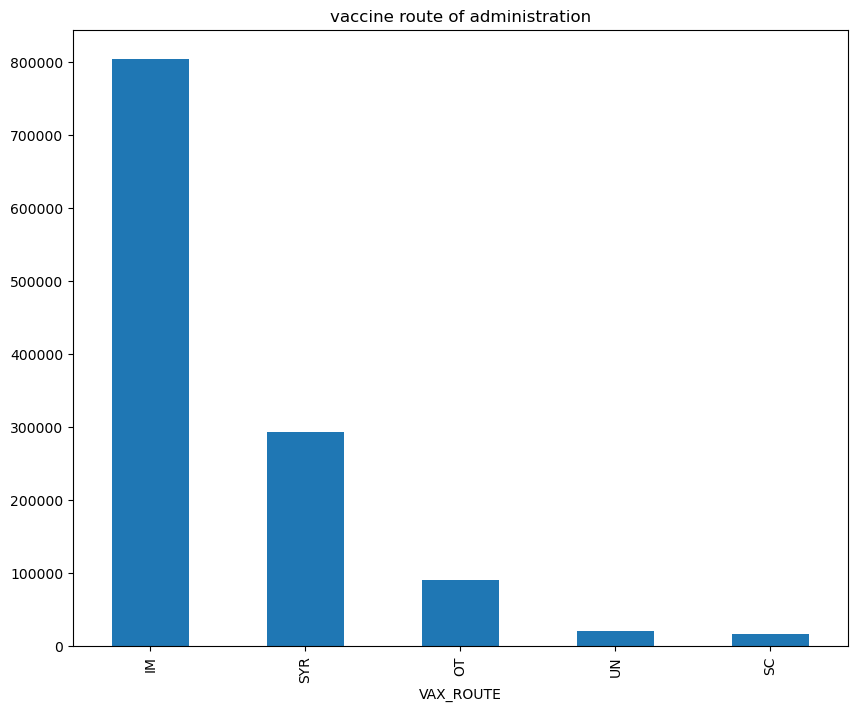

In [176]:
plt.figure(figsize=(10,8))
route = vaers_df['VAX_ROUTE'].value_counts().sort_values(ascending=False)[:5]
route.plot(kind='bar', title='vaccine route of administration')

<Axes: title={'center': 'Vacination Site '}, ylabel='VAX_SITE'>

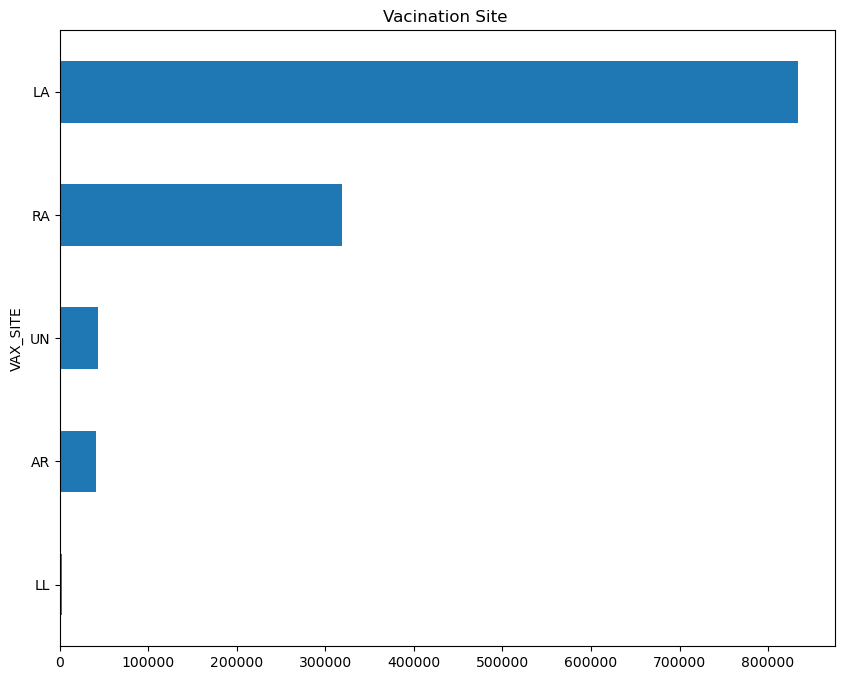

In [177]:

plt.figure(figsize=(10,8))
site = vaers_df['VAX_SITE'].value_counts().sort_values(ascending=True)[-5:]
site.plot(kind='barh', title='Vacination Site ')

<Axes: title={'center': 'Lot number of the vaccines'}, ylabel='VAX_LOT'>

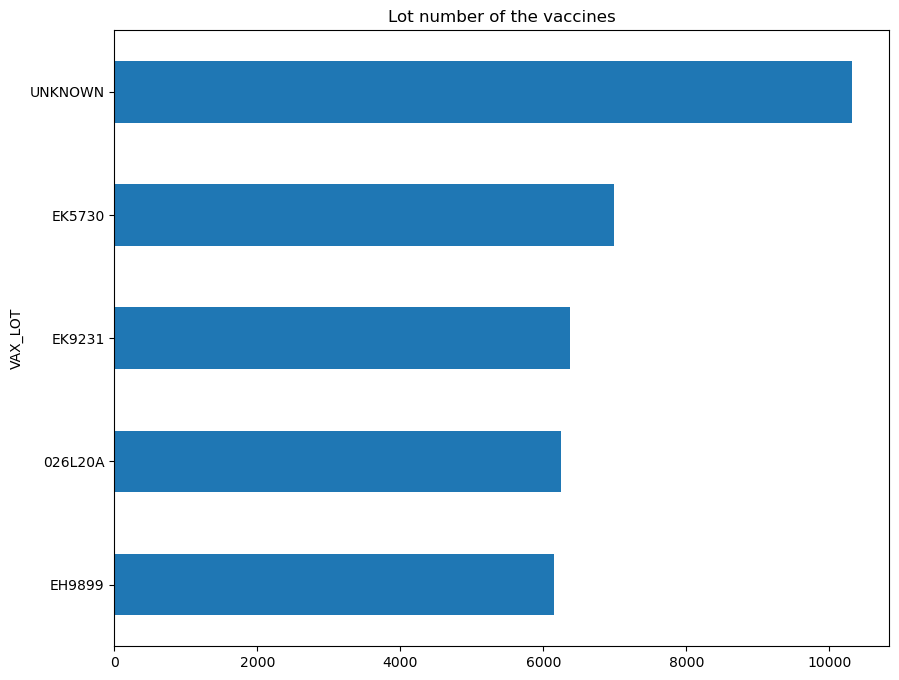

In [178]:
plt.figure(figsize=(10,8))
lot = vaers_df['VAX_LOT'].value_counts().sort_values(ascending=True)[-5:]
lot.plot(kind='barh', title='Lot number of the vaccines')

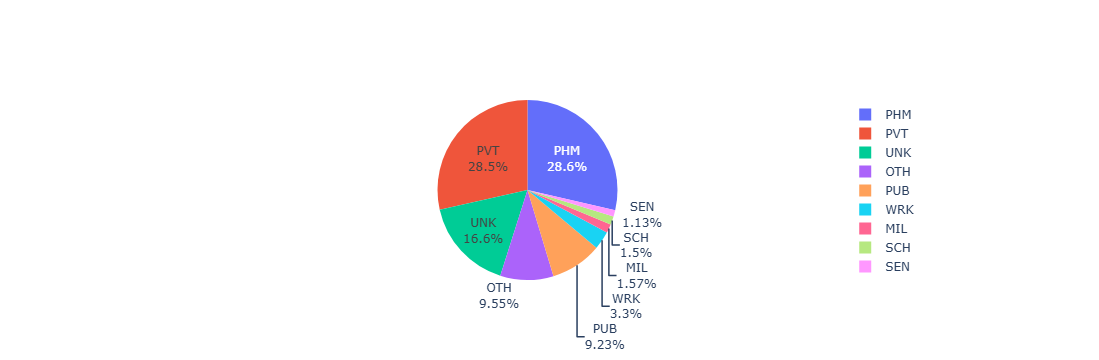

In [179]:
# Where was the vaccine given/administered

import plotly.graph_objects as go
g_index = vaers_df['V_ADMINBY'].value_counts().index
g_value = vaers_df['V_ADMINBY'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

<Axes: title={'center': 'Lot number of the vaccines'}, xlabel='VAX_DOSE_SERIES'>

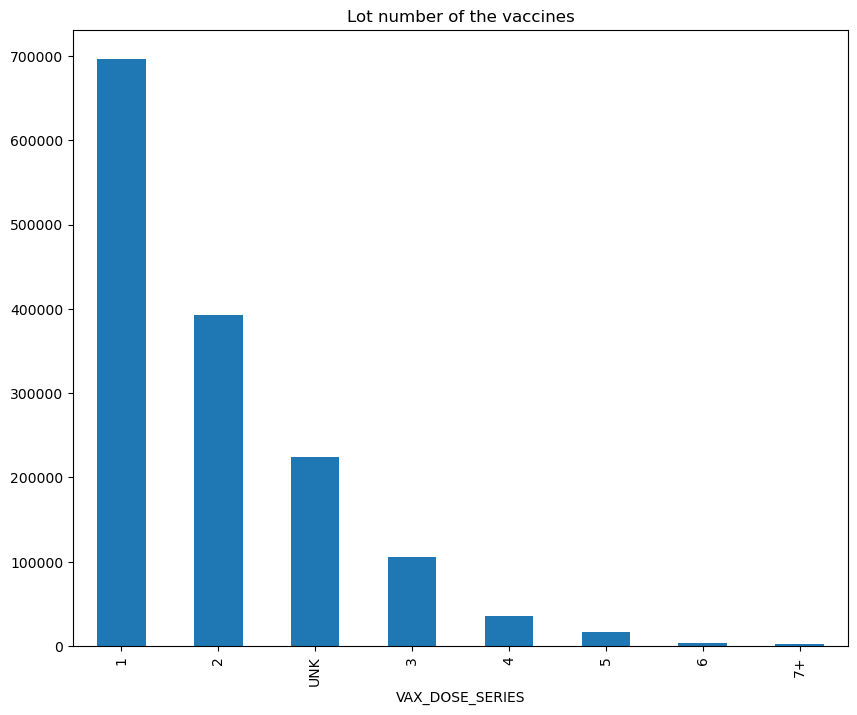

In [180]:
plt.figure(figsize=(10,8))
lot = vaers_df['VAX_DOSE_SERIES'].value_counts().sort_values(ascending=False)[-10:]
lot.plot(kind='bar', title='Lot number of the vaccines')

## From the above we found that there is no significant information which we can use for further analysis so we are dropping the columns

In [182]:

vaers_df = vaers_df.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'V_ADMINBY'])
vaers_df.head(2)

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,VAX_TYPE,VAX_MANU,VAX_NAME,ORDER_y,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ORDER
0,547879,WI,11.0,0.0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,HPV4,MERCK & CO. INC.,HPV (GARDASIL),2,ABDOMINAL PAIN,BLOOD PRESSURE DECREASED,CHRONIC FATIGUE SYNDROME,DIZZINESS,HEART RATE INCREASED,2
1,547879,WI,11.0,0.0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,HPV4,MERCK & CO. INC.,HPV (GARDASIL),2,INSOMNIA,MIGRAINE,NAUSEA,POSTURAL ORTHOSTATIC TACHYCARDIA SYNDROME,SERUM FERRITIN DECREASED,2


In [183]:
vaers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1501302 entries, 0 to 1588394
Data columns (total 30 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1501302 non-null  int64  
 1   STATE         1501302 non-null  object 
 2   AGE_YRS       1501302 non-null  float64
 3   SEX           1501268 non-null  float64
 4   SYMPTOM_TEXT  1501302 non-null  object 
 5   DIED          1501302 non-null  int64  
 6   L_THREAT      1501302 non-null  int64  
 7   HOSPITAL      1501302 non-null  int64  
 8   HOSPDAYS      1501302 non-null  float64
 9   DISABLE       1501302 non-null  int64  
 10  RECOVD        1501302 non-null  int64  
 11  VAX_DATE      1501302 non-null  object 
 12  ONSET_DATE    1501302 non-null  object 
 13  NUMDAYS       1501302 non-null  int64  
 14  OTHER_MEDS    1501302 non-null  object 
 15  CUR_ILL       1501302 non-null  object 
 16  HISTORY       1501302 non-null  object 
 17  BIRTH_DEFECT  1501302 non-null  

In [184]:
vaers_df.to_csv(r'C:\Users\Admin\Downloads\capstone\cleaned_vaers.csv', index=False)

In [185]:

vaers_df.shape

(1501302, 30)

## Merging symptoms 1-5 as a single column symptom

In [187]:

vaers_df.loc[vaers_df.duplicated(subset=['VAERS_ID']), :]

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,VAX_TYPE,VAX_MANU,VAX_NAME,ORDER_y,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,ORDER
1,547879,WI,11.0,0.0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,HPV4,MERCK & CO. INC.,HPV (GARDASIL),2,INSOMNIA,MIGRAINE,NAUSEA,POSTURAL ORTHOSTATIC TACHYCARDIA SYNDROME,SERUM FERRITIN DECREASED,2
2,547879,WI,11.0,0.0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,HPV4,MERCK & CO. INC.,HPV (GARDASIL),2,SYNCOPE,TILT TABLE TEST POSITIVE,VITAMIN D DECREASED,VITAMIN D DEFICIENCY,,2
3,547879,WI,11.0,0.0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,HPV4,MERCK & CO. INC.,HPV (GARDASIL),2,ABDOMINAL DISCOMFORT,ABDOMINAL PAIN,AGITATION,AMNESIA,ANTIBODY TEST POSITIVE,3
4,547879,WI,11.0,0.0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,HPV4,MERCK & CO. INC.,HPV (GARDASIL),2,ARTHRALGIA,ASTHENIA,AUTOIMMUNE NEUROPATHY,AUTONOMIC NEUROPATHY,BACK PAIN,3
5,547879,WI,11.0,0.0,SENSITIVY TO LIGHT TROUBLE HEARING SHORT TERM ...,0,0,0,0.0,1,...,HPV4,MERCK & CO. INC.,HPV (GARDASIL),2,BEDRIDDEN,BONE PAIN,CENTRAL VENOUS CATHETERISATION,CHEST PAIN,CHILLS,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588388,2855969,TN,57.0,0.0,PT SAYS SHE ON SHE WAS FEELING VERY FATIGUE AN...,0,0,1,14.0,1,...,COVID,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),1,LABORATORY TEST,MAGNETIC RESO CE IMAGING,MUSCULAR WEAKNESS,MYELITIS TRANSVERSE,PAIN IN EXTREMITY,1
1588389,2855969,TN,57.0,0.0,PT SAYS SHE ON SHE WAS FEELING VERY FATIGUE AN...,0,0,1,14.0,1,...,COVID,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),1,PLASMAPHERESIS,WHEELCHAIR USER,,,,1
1588391,2855970,FL,66.0,0.0,I GOT THE INJECTION AROUND NOON AND I CAME HOM...,0,0,0,0.0,0,...,FLU,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUBLOK),1,VOMITING,,,,,1
1588393,2855990,TX,32.0,1.0,ARM WRIST LEG SWELLING THAT COMES AND GOES AND...,0,0,0,0.0,1,...,COVID,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),1,CHEST X-RAY NORMAL,COMPUTERISED TOMOGRAM HEAD NORMAL,FATIGUE,HYPERACUSIS,JOINT SWELLING,1


In [188]:

vaers_df.shape

(1501302, 30)

In [189]:
# First, combine all symptom columns into a single list
vaers = vaers_df.copy()
symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
vaers_df['SYMPTOMS'] = vaers_df[symptom_columns].apply(lambda row: ','.join(row.dropna()), axis=1)

# Now, drop the individual symptom columns
vaers_df = vaers_df.drop(columns=symptom_columns)

# Group by VAERS_ID and SYMPTOMS, then reset the index
vaers_df = vaers_df.groupby(['VAERS_ID', 'SYMPTOMS']).first().reset_index()

# Split the SYMPTOMS string into a list
vaers_df['SYMPTOMS'] = vaers_df['SYMPTOMS'].str.split(',')

# Remove any empty strings from the SYMPTOMS lists
vaers_df['SYMPTOMS'] = vaers_df['SYMPTOMS'].apply(lambda x: [sym.strip() for sym in x if sym.strip()])

In [190]:

vaers_df.head(2)

,VAERS_ID,SYMPTOMS,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,...,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,ORDER_x,VAX_TYPE,VAX_MANU,VAX_NAME,ORDER_y,ORDER
0,50938,"[ARTHRALGIA, CONDITION AGGRAVATED, ERYTHEMA, E...",OR,73.0,0.0,LUMP ITCHY LARGE RED LUMP COLD JOINT PAIN RUNN...,0,0,0,0.0,...,ARTHRALGIA DIABETES HERPES ZOSTER IMMUNOCOMPRO...,MEDICAL HISTORY CONCURRENT CONDITIONS HEART TR...,0,,3,HEP,UNKNOWN MANUFACTURER,HEP B (NO BRAND NAME),2,3
1,50938,"[INJECTION SITE ERYTHEMA, INJECTION SITE MASS,...",OR,73.0,0.0,LUMP ITCHY LARGE RED LUMP COLD JOINT PAIN RUNN...,0,0,0,0.0,...,ARTHRALGIA DIABETES HERPES ZOSTER IMMUNOCOMPRO...,MEDICAL HISTORY CONCURRENT CONDITIONS HEART TR...,0,,3,HEP,UNKNOWN MANUFACTURER,HEP B (NO BRAND NAME),2,3


In [191]:
sym_df = vaers_df[['VAERS_ID', 'SYMPTOMS']]
sym_df.head(2)

,VAERS_ID,SYMPTOMS
0,50938,"[ARTHRALGIA, CONDITION AGGRAVATED, ERYTHEMA, E..."
1,50938,"[INJECTION SITE ERYTHEMA, INJECTION SITE MASS,..."


In [192]:

sym_df.explode('SYMPTOMS')

,VAERS_ID,SYMPTOMS
0,50938,ARTHRALGIA
0,50938,CONDITION AGGRAVATED
0,50938,ERYTHEMA
0,50938,EYE DISCHARGE
0,50938,FEELING ABNORMAL
...,...,...
1129923,2855990,JOINT SWELLING
1129924,2855990,PERIPHERAL SWELLING
1129924,2855990,POSTURAL ORTHOSTATIC TACHYCARDIA SYNDROME
1129924,2855990,SARS-COV-2 ANTIBODY TEST POSITIVE


In [193]:
unique_ade = [val.strip() for sublist in vaers_df.SYMPTOMS for val in sublist if isinstance(val, str)]

In [194]:
# Flatten the list of symptoms
all_symptoms = [symptom for symptoms_list in vaers_df['SYMPTOMS'] for symptom in symptoms_list if isinstance(symptom, str)]

# Create a DataFrame with symptom counts
symptoms_summary = pd.DataFrame(all_symptoms, columns=['SYMPTOMS'])
symptoms_summary = symptoms_summary['SYMPTOMS'].value_counts().reset_index()
symptoms_summary.columns = ['SYMPTOMS', 'count']

In [195]:

symptoms_summary[0:10]

,SYMPTOMS,count
0,HEADACHE,135239
1,FATIGUE,117431
2,PYREXIA,115998
3,PAIN,110531
4,CHILLS,100062
5,PAIN IN EXTREMITY,82020
6,DIZZINESS,80986
7,NAUSEA,78938
8,INJECTION SITE PAIN,61520
9,ARTHRALGIA,49696


In [196]:

symptoms_summary.SYMPTOMS[0:5]

0    HEADACHE
1     FATIGUE
2     PYREXIA
3        PAIN
4      CHILLS
Name: SYMPTOMS, dtype: object

In [297]:
covid_df = vaers[vaers['VAX_TYPE'].str.contains("COVID", case=False, na=False)].copy()
non_covid_df = vaers[~vaers['VAX_TYPE'].str.contains("COVID", case=False, na=False)].copy()


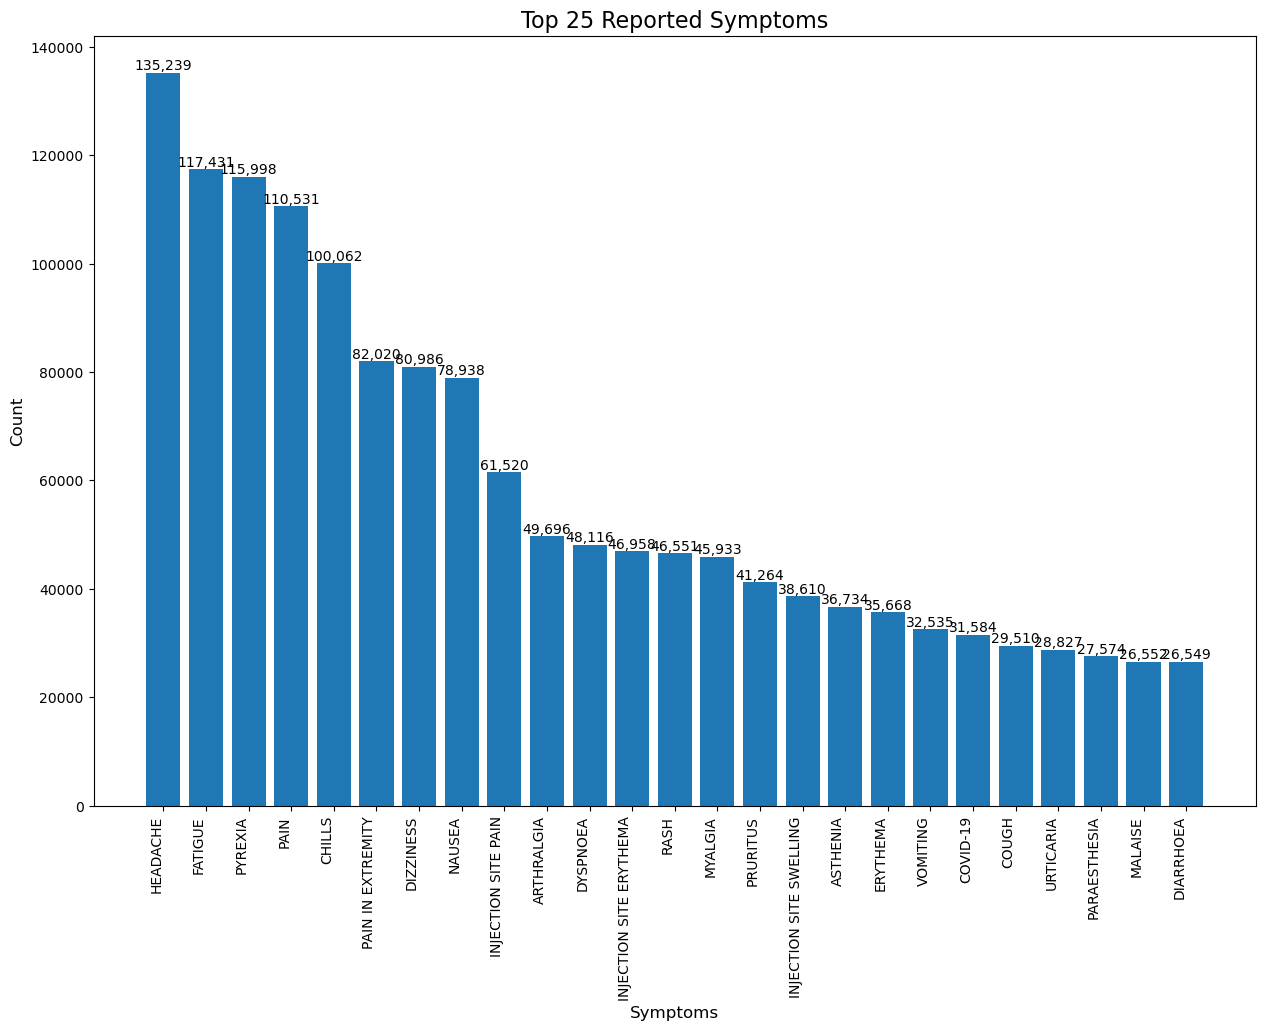

In [197]:
top_25_symptoms = symptoms_summary.sort_values('count', ascending=False).head(25)
total_count = symptoms_summary['count'].sum()

# Create the plot
plt.figure(figsize=(15, 10))
bars = plt.bar(top_25_symptoms['SYMPTOMS'], top_25_symptoms['count'])

plt.xticks(rotation=90, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

plt.title('Top 25 Reported Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


#🧹 COVID-19 vs Non-COVID Analysis

Separating **COVID-19 vaccine reports** from all others, 
we now filter the VAERS dataset into two subsets:
- **COVID-19**: `VAX_TYPE == 'COVID19'`
- **Non-COVID**: all other vaccine types

We then perform EDA and cleaning comparisons on both groups.


In [199]:

# Separate COVID-19 vs Non-COVID reports
covid_df = vaers[vaers['VAX_TYPE'] == 'COVID19'].copy()
non_covid_df = vaers[vaers['VAX_TYPE'] != 'COVID19'].copy()

print("COVID Reports:", covid_df.shape)
print("Non-COVID Reports:", non_covid_df.shape)


COVID Reports: (0, 30)
Non-COVID Reports: (1501302, 30)


## 👩‍⚕️ Demographics Comparison

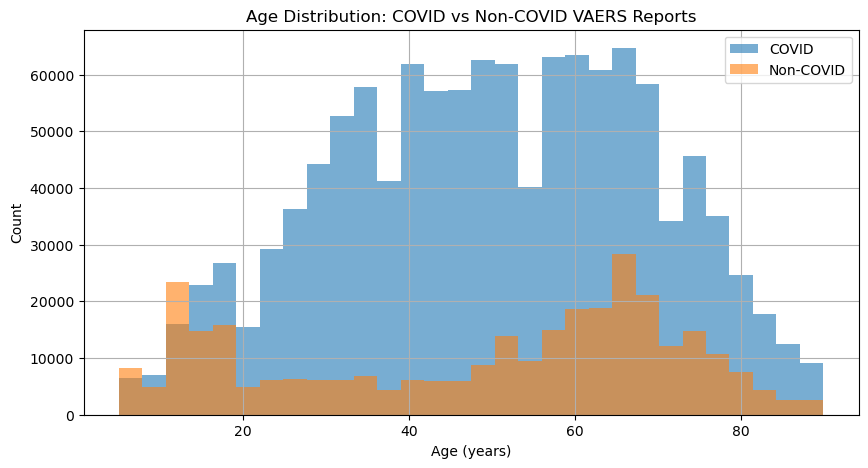

COVID Gender Distribution:
 SEX
0.0    0.691686
1.0    0.304786
2.0    0.003528
Name: proportion, dtype: float64

Non-COVID Gender Distribution:
 SEX
0.0    0.675394
1.0    0.317285
2.0    0.007322
Name: proportion, dtype: float64


In [299]:

# Age distribution comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
covid_df['AGE_YRS'].dropna().hist(bins=30, alpha=0.6, label="COVID")
non_covid_df['AGE_YRS'].dropna().hist(bins=30, alpha=0.6, label="Non-COVID")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.title("Age Distribution: COVID vs Non-COVID VAERS Reports")
plt.legend()
plt.show()

# Gender distribution comparison
print("COVID Gender Distribution:\n", covid_df['SEX'].value_counts(normalize=True))
print("\nNon-COVID Gender Distribution:\n", non_covid_df['SEX'].value_counts(normalize=True))


## 🏥 Outcomes Comparison

In [301]:

outcomes = ['DIED', 'L_THREAT', 'HOSPITAL', 'DISABLE']

for col in outcomes:
    covid_rate = covid_df[col].value_counts(normalize=True)
    noncovid_rate = non_covid_df[col].value_counts(normalize=True)
    print(f"=== {col} ===")
    print("COVID:\n", covid_rate)
    print("Non-COVID:\n", noncovid_rate)
    print("\n")


=== DIED ===
COVID:
 DIED
0    0.970657
1    0.029343
Name: proportion, dtype: float64
Non-COVID:
 DIED
0    0.991764
1    0.008236
Name: proportion, dtype: float64


=== L_THREAT ===
COVID:
 L_THREAT
0    0.951525
1    0.048475
Name: proportion, dtype: float64
Non-COVID:
 L_THREAT
0    0.976007
1    0.023993
Name: proportion, dtype: float64


=== HOSPITAL ===
COVID:
 HOSPITAL
0    0.832646
1    0.167354
Name: proportion, dtype: float64
Non-COVID:
 HOSPITAL
0    0.914037
1    0.085963
Name: proportion, dtype: float64


=== DISABLE ===
COVID:
 DISABLE
0    0.945008
1    0.054992
Name: proportion, dtype: float64
Non-COVID:
 DISABLE
0    0.954422
1    0.045578
Name: proportion, dtype: float64




## 🤒 Symptom Comparison

In [304]:

# Most common symptoms for COVID vs Non-COVID
print("Top 10 COVID Symptoms:")
print(covid_df['SYMPTOM1'].value_counts().head(10))

print("\nTop 10 Non-COVID Symptoms:")
print(non_covid_df['SYMPTOM1'].value_counts().head(10))


Top 10 COVID Symptoms:
SYMPTOM1
CHILLS                     50212
ARTHRALGIA                 43662
DIZZINESS                  35110
FATIGUE                    27287
ASTHENIA                   27081
HEADACHE                   24964
COVID-19                   22544
PYREXIA                    19704
INJECTION SITE ERYTHEMA    17500
PAIN                       16663
Name: count, dtype: int64

Top 10 Non-COVID Symptoms:
SYMPTOM1
INJECTION SITE ERYTHEMA    14739
CHILLS                     13246
ERYTHEMA                   12888
ARTHRALGIA                 10629
DIZZINESS                   9074
ASTHENIA                    7061
INJECTION SITE PAIN         6538
EXTRA DOSE ADMINISTERED     6432
NO ADVERSE EVENT            5704
PYREXIA                     5606
Name: count, dtype: int64


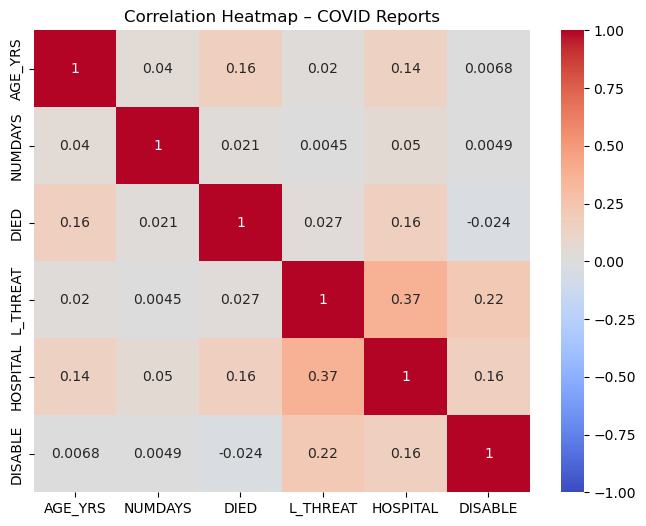

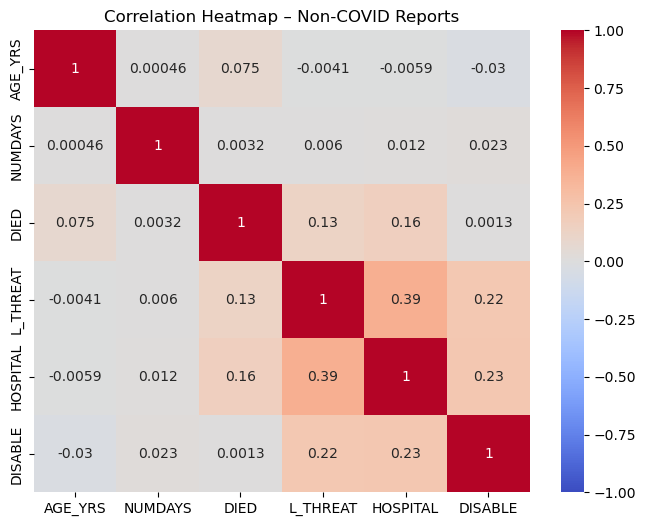

In [306]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(covid_df[['AGE_YRS','NUMDAYS','DIED','L_THREAT','HOSPITAL','DISABLE']].corr(),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap – COVID Reports")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(non_covid_df[['AGE_YRS','NUMDAYS','DIED','L_THREAT','HOSPITAL','DISABLE']].corr(),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap – Non-COVID Reports")
plt.show()


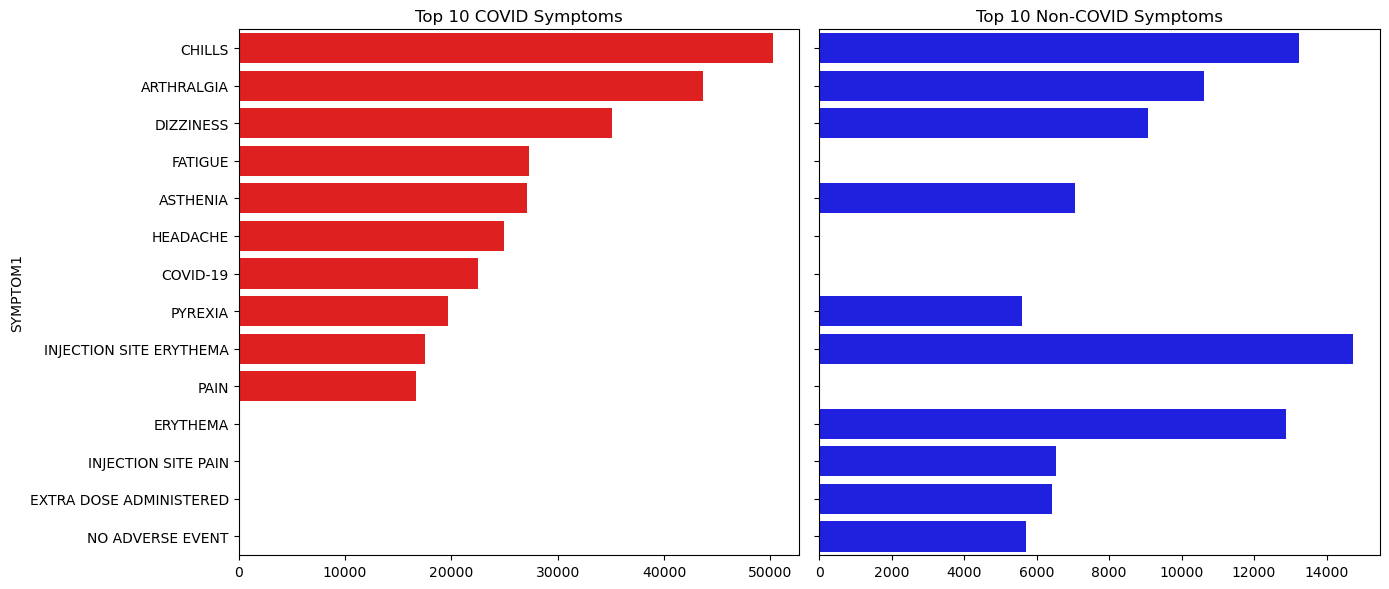

In [308]:
top_covid_symptoms = covid_df['SYMPTOM1'].value_counts().head(10)
top_non_covid_symptoms = non_covid_df['SYMPTOM1'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.barplot(y=top_covid_symptoms.index, x=top_covid_symptoms.values, ax=axes[0], color="red")
axes[0].set_title("Top 10 COVID Symptoms")

sns.barplot(y=top_non_covid_symptoms.index, x=top_non_covid_symptoms.values, ax=axes[1], color="blue")
axes[1].set_title("Top 10 Non-COVID Symptoms")

plt.tight_layout()
plt.show()


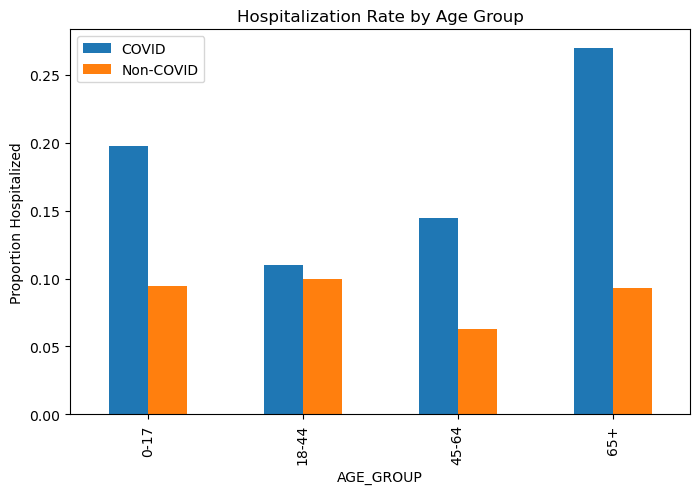

In [310]:
def age_bucket(age):
    if age < 18: return "0-17"
    elif age < 45: return "18-44"
    elif age < 65: return "45-64"
    else: return "65+"

covid_df['AGE_GROUP'] = covid_df['AGE_YRS'].dropna().apply(age_bucket)
non_covid_df['AGE_GROUP'] = non_covid_df['AGE_YRS'].dropna().apply(age_bucket)

age_outcomes_covid = covid_df.groupby('AGE_GROUP')['HOSPITAL'].mean()
age_outcomes_non = non_covid_df.groupby('AGE_GROUP')['HOSPITAL'].mean()

compare_df = pd.DataFrame({"COVID": age_outcomes_covid, "Non-COVID": age_outcomes_non})
compare_df.plot(kind="bar", figsize=(8,5))
plt.title("Hospitalization Rate by Age Group")
plt.ylabel("Proportion Hospitalized")
plt.show()
